CMU Optimal control -- Root Finding

Add packages we need

In [2]:
using Pkggggg
Pkg.add("LinearAlgebra")
Pkg.add("ForwardDiff")
Pkg.add("PyPlot")

  Resolving package versions...
No Changes to `C:\Users\yxtang\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\yxtang\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
  Installed NaNMath ────────────────────── v0.3.5
  Installed CompilerSupportLibraries_jll ─ v0.3.4+0
  Installed OpenSpecFun_jll ────────────── v0.5.3+4
  Installed DiffResults ────────────────── v1.0.3
  Installed DiffRules ──────────────────── v1.0.2
  Installed Compat ─────────────────────── v3.25.0
  Installed CommonSubexpressions ───────── v0.3.0
  Installed ForwardDiff ────────────────── v0.10.16
  Installed MacroTools ─────────────────── v0.5.6
  Installed ChainRulesCore ─────────────── v0.9.29
  Installed SpecialFunctions ───────────── v1.3.0
  Installed StaticArrays ───────────────── v1.0.1
Updating `C:\Users\yxtang\.julia\environments\v1.5\Project.toml`
  [f6369f11] + ForwardDiff v0.10.16
Updating `C:\Users\yxtang\.julia\environments\v1.5\Manifest.toml`
  [d360d2e6] + Chain

In [1]:
using LinearAlgebra
using ForwardDiff
using PyPlot

In [2]:
function pendulum_dynamics(x)
    l = 1.0
    g = 9.81
    q = x[1]
    qd = x[2]
    qdd = -(g/l)*sin(q)

    return [qd;qdd]
end

pendulum_dynamics (generic function with 1 method)

In [3]:
function backward_euler_step_fixed_point_iteration(func, x0, h)
    # integration step using fixed point iteration (easy but not guaranteed) (solve x=g(x) <-- f(x)=0)
    xn = x0 # initial guess
    e = [norm(x0 + h.*func(xn) - xn)]
    while e[end] > 1e-8
        xn = x0 + h .* func(xn)
        e = [e;norm(x0 + h.*func(xn) - xn)]
    end
    return xn, e
end

backward_euler_step_fixed_point_iteration (generic function with 1 method)

In [4]:
function backward_euler_step_newton(func, x0, h)
    # intgration step using newton method
    xn = x0 # initial guess
    r = x0 + h .* func(xn) - xn
    e = [norm(r)]
    while e[end] > 1e-8
        ∂r = ForwardDiff.jacobian(x -> x0 + h .* func(x) - x, xn)
        xn = xn - 0.8*∂r\r
        r = x0 + h .* func(xn) - xn
        e = [e;norm(r)]
    end
    return xn, e
end

backward_euler_step_newton (generic function with 1 method)

In [5]:
function backward_euler_fixed_point_iteration(func, x0, Tf, h)
    # forward integration using fixed point iteration 
    t = Array(range(0, Tf, step=h))
    x_sol = zeros(length(x0),length(t))
    x_sol[:,1] .= x0
    for k = 1:(length(t)-1)
        x_sol[:,k+1], e = backward_euler_step_fixed_point_iteration(func, x_sol[:,k],h)
    end
    
    return x_sol, t
end

backward_euler_fixed_point_iteration (generic function with 1 method)

In [6]:
function backward_euler_newton(func, x0, Tf, h)
    # forward integration using Newton method
    t = Array(range(0, Tf, step=h))
    x_sol = zeros(length(x0),length(t))
    x_sol[:,1] .= x0
    for k = 1:(length(t)-1)
        x_sol[:,k+1], e = backward_euler_step_newton(func, x_sol[:,k], h)
    end
    
    return x_sol, t
end

backward_euler_newton (generic function with 1 method)

In [7]:
# run forward simulation
x0 = [0.1; 0.0]
Tf = 10
h = .01
x_sol1, t1 = backward_euler_fixed_point_iteration(pendulum_dynamics, x0, Tf, h)
x_sol2, t2 = backward_euler_newton(pendulum_dynamics, x0, Tf, h)


([0.1 0.09990215901463409 … 0.06061145069853452 0.06083671500897237; 0.0 -0.009784098536591693 … 0.0284908535542212 0.022526458214780748], [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99, 10.0])

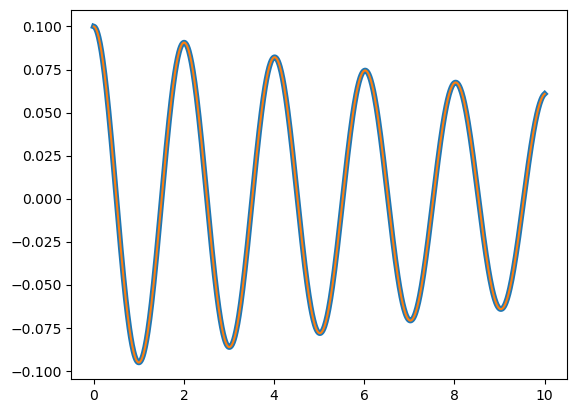

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001132D30>

In [8]:
plot(t1,x_sol1[1,:],linewidth=4.0)
plot(t2,x_sol2[1,:])

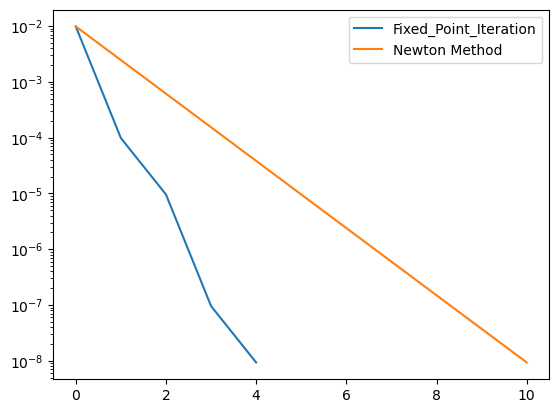

PyObject <matplotlib.legend.Legend object at 0x00000000022FDB20>

In [9]:
xn1,e1 = backward_euler_step_fixed_point_iteration(pendulum_dynamics,x0,h)
xn2,e2 = backward_euler_step_newton(pendulum_dynamics,x0,h)
semilogy(e1)
semilogy(e2)
legend(["Fixed_Point_Iteration", "Newton Method"])